# Time Prediction Using STUMPY

In [24]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import stumpy

In [2]:
df = pd.read_excel('upwork_stump_dataset.xlsx')
print('dataset has {} entries'.format(len(df)))

dataset has 5383 entries


In [3]:
print(df.head(10))

        Date   Value      RMI  Label(to predict)
0 2021-02-25  0.0319  28.5075                NaN
1 2021-02-24  0.0319  30.4234                NaN
2 2021-02-23  0.0324  32.3257                NaN
3 2021-02-22  0.0325  33.7445                NaN
4 2021-02-19  0.0332  36.1516                NaN
5 2021-02-18  0.0331  38.3615          -0.036254
6 2021-02-17  0.0333  41.1716          -0.042042
7 2021-02-16  0.0339  44.2091          -0.044248
8 2021-02-12  0.0344  46.3975          -0.055233
9 2021-02-11  0.0345  47.7925          -0.037681


In [4]:
df = df.set_index('Date')

In [5]:
print(df.index)

DatetimeIndex(['2021-02-25', '2021-02-24', '2021-02-23', '2021-02-22',
               '2021-02-19', '2021-02-18', '2021-02-17', '2021-02-16',
               '2021-02-12', '2021-02-11',
               ...
               '1999-10-18', '1999-10-15', '1999-10-14', '1999-10-13',
               '1999-10-12', '1999-10-11', '1999-10-08', '1999-10-07',
               '1999-10-06', '1999-10-05'],
              dtype='datetime64[ns]', name='Date', length=5383, freq=None)


In [6]:
print(df.sample(10, random_state=0))

             Value      RMI  Label(to predict)
Date                                          
2019-03-05  0.0154  56.0098           0.032468
2006-04-03  0.0015  35.7675           0.066667
2016-09-08  0.0114  59.5855           0.114035
2005-09-30  0.0013  80.4000           0.000000
2001-07-03  0.0003  65.2178           0.000000
2019-05-10  0.0168  58.9145          -0.035714
2010-02-16  0.0057  55.4213          -0.035088
2004-09-10  0.0005  78.8502           0.000000
2004-01-27  0.0003  48.3134           0.000000
2003-01-27  0.0003  45.8297           0.000000


# Plot the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(rc={'figure.figsize':(20, 4)})

## RMI through time

<AxesSubplot:xlabel='Date'>

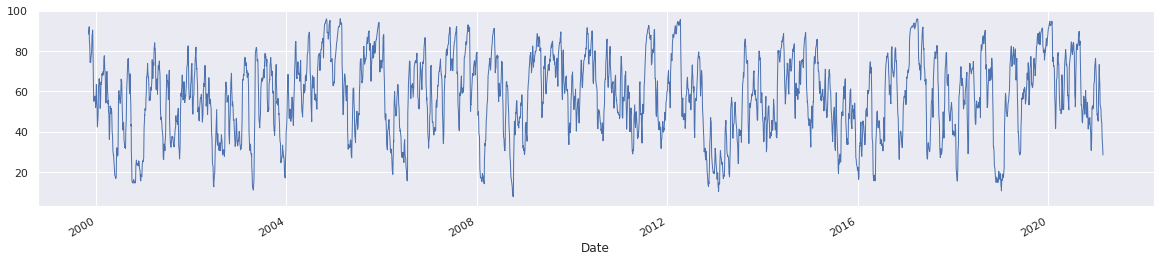

In [9]:
df['RMI'].plot(linewidth=1)

## Value through time

<AxesSubplot:xlabel='Date'>

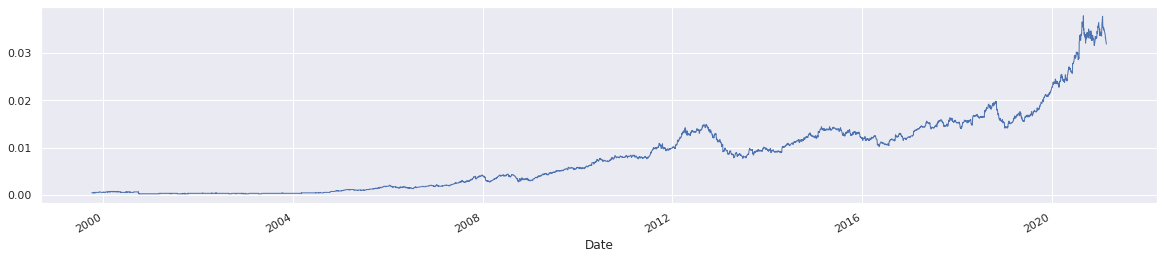

In [10]:
df['Value'].plot(linewidth=1)

## Label through time

<AxesSubplot:xlabel='Date'>

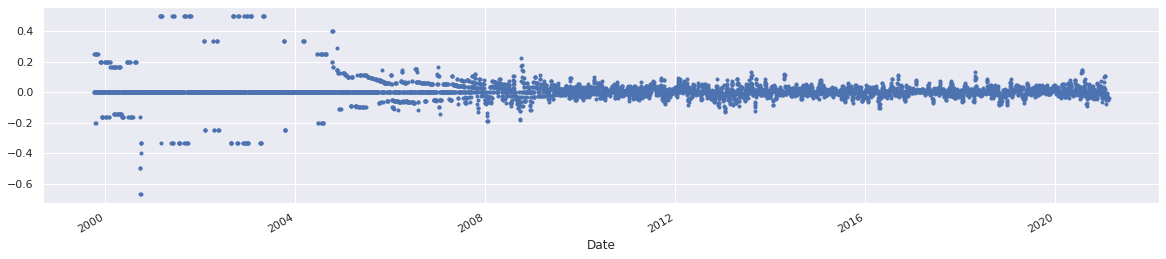

In [11]:
df['Label(to predict)'].plot(marker='.', linestyle='None')

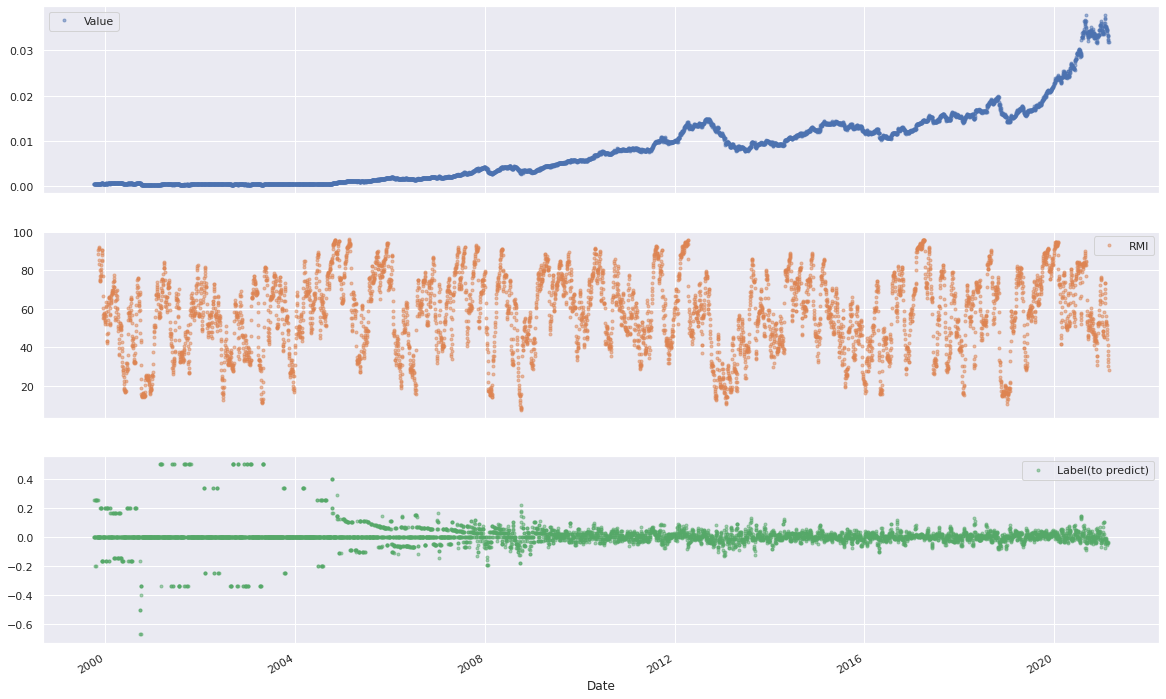

In [12]:
cols_plot = ['Value', 'RMI', 'Label(to predict)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 13), subplots=True)

# Process Flow
The goal is to identify the top k-matches for a few select subsequences.

1. Compute the matrix profile
2. From the matrix profile, identify the subset of motifs/subsequence patterns you are interested in
3. Using this set of subsequences, compute the distance profile via fast pattern searching approach.

## Getting the Matrix Profile

In [121]:
m = 15
k = 10
mp = stumpy.stump(df['RMI'], m)

In [108]:
print(mp)

[[0.31183899480779825 4706 -1 4706]
 [0.3344392628118452 4185 -1 4185]
 [0.319206260149938 3488 -1 3488]
 ...
 [inf -1 -1 -1]
 [inf -1 -1 -1]
 [inf -1 -1 -1]]


## Sorted Indices
The motif indices are sorted in descending order. We can obtain the top k indices from the list.

In [127]:
top_k_indices = np.argsort(mp[:,0])[0:k]
print('the top {} indices are given by {}'.format(k, top_k_indices))

the top 10 indices are given by [ 859 2105 4784  185 4785  186 3247 3026 1095 2805]


## Nearest Neighbors
The information above can be used to obtain the corresponding nearest neighbors.

In [125]:
nearest_neighbor_indices = []

for index in top_k_indices:
    nearest_neighbor_indices.append(mp[index,1])

print('the nearest neighbors for each motif are given by: {}'.format(nearest_neighbor_indices))

the nearest neighbors for each motif are given by: [2105, 859, 185, 4784, 186, 4785, 3026, 3247, 2805, 1095]


## Plotting Each Motif Pair

Double click on the figure to zoom in. Each pair corresponds to one color.

In [137]:
# map a distinct color to each pair 
cmap = plt.cm.get_cmap('rainbow', k)

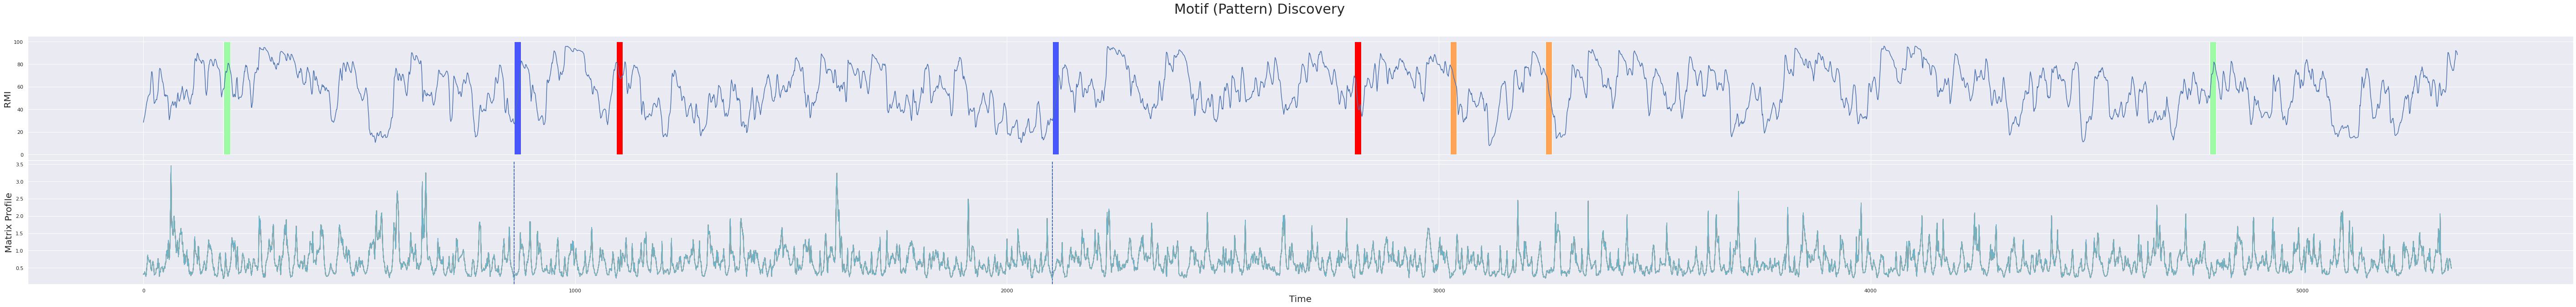

In [138]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(100,10))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df['RMI'].values)
axs[0].set_ylabel('RMI', fontsize='20')

for i in range(len(top_k_indices)):
    rect = Rectangle((top_k_indices[i], 0), m, 100, facecolor=cmap(i))
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_indices[i], 0), m, 100, facecolor=cmap(i))
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])

plt.show()

## Creating a distance profile via fast pattern searching approach